# Assignment 2

### MACS 30000, Dr. Evans
### Dhruval Bhatt 
### Jupyter Template by Nora Nickels

Due Wednesday, Oct. 17 at 11:30 AM

In [20]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### 1. Imputing age and gender

#### (a) BestIncome.txt is is missing attributes Age and Gender. To impute that data, we can use the information from another dataset, SurveyIncome that has the values of age and gender and income is a common variable between the two. Here I make an assumption that total income is equivalent to sum of labor income and capital income. One way to impute this data is to run a linear regression on the survey data to quantify the relation between income and weight versus age or gender. 

#### To impute age data, we use the following OLS equation
######  age_i = bo+ b1(weight)_i + b1(totalinc)_i

#### To impute gender data, we use the following OLS equation
##### gender_i = b0 + b1(weight)_i + b2(totalinc)_i
##### If the value is greater than 0.5, we can assign female, else male

In [3]:
# Read Best Income Data
income = pd.read_csv('BestIncome.txt')
income.columns = ["labor_inc", "capital_inc", "height", "weight"]
income.head()

# Name my variables
labor_inc = income["labor_inc"]
capital_inc = income ["capital_inc"]
b_tot_inc = income["labor_inc"] + income ["capital_inc"]
height = income ["height"]
b_weight = income ["weight"]


In [60]:
# Read Survey Data
survey = pd.read_csv('SurvIncome.txt')
survey.columns = ["tot_inc", "weight", "age", "gender"]
survey.head()

# Name my variables
s_tot_inc = survey["tot_inc"]
s_weight = survey["weight"]
age = survey["age"]
gender = survey["gender"]


#### (b) The code below is the implementation for  my proposed method from part (a) to impute variables, age and gender

In [132]:
#Linear Regression to Predict Age using weight and Income
#The outcome variable is age and the independant variables are weight and income. 

#Run Regression Using Statsmodels

Attempted Regression Analysis in Excel
Age Regression Coefficients: 
B0 = 44.20966681
B1 = 2.52022E-05
B2 = -0.006722144

Gender Regression Coefficients: 
B0 = 3.761142211
B1 = -0.019530255
B2 = -5.24956E-06

#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [ ]:
# The descriptive statistics for imputated age and gender
# X_vars.describe()

#### (d) Correlation matrix for the now six variables

In [ ]:
# Correlation matrix code and output


### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [137]:
# Read IncomeIntel.txt
intel = pd.read_csv('IncomeIntel.txt')
intel.columns = ["grad_year", "quant_score", "salary"]
intel.head()

# Name my variables
gradyear = intel["grad_year"]
quantscore = intel["quant_score"]
salary = intel["salary"]


Estimate OLS and Report Coefficients

Attempted OLS in Excel Sheet. 

Coefficients: 
beta0 = 89541.29
beta1 = -25.7631

#### (b) Create a scatterplot of GRE score and graduation year. 

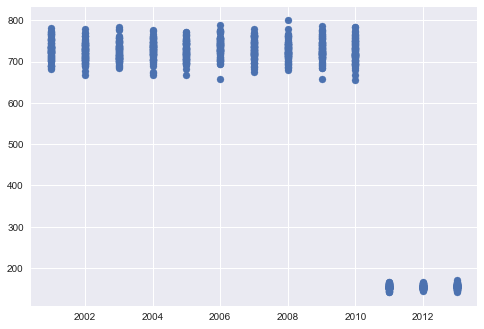

In [25]:
# Code and output of scatterplot of GRE score and grad year
# Make scatterplot of education on income
# simple scatterplot using matplotlib

df = pd.DataFrame(intel, columns = ['grad_year','quant_score'])
plt.scatter(df.grad_year, df.quant_score)
plt.show()

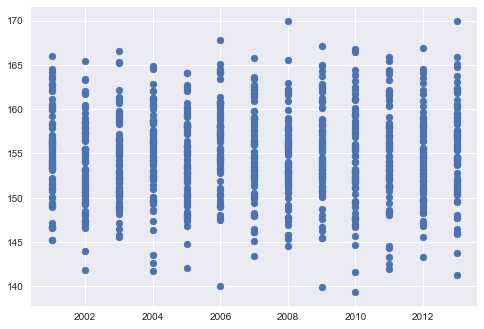

In [190]:
# Code to implement solution
quantscore_n = []

for i, val in enumerate(gradyear): 
    if val < 2011.0:
        #print(i, val, quantscore[i])
        s = (170/800) * (quantscore[i])
        quantscore_n.append(s)
    else:
        s = quantscore[i]
        quantscore_n.append(s)

       
df = pd.DataFrame(intel)
df['scaled_GRE'] = quantscore_n 
plt.scatter(df.grad_year, df.scaled_GRE)
plt.show()


#### (c) Create a scatterplot of income and graduation year

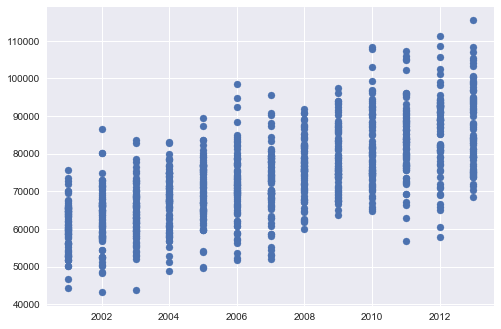

In [139]:
# Code and output of scatterplot
df = pd.DataFrame(intel, columns = ['salary','grad_year'])
plt.scatter(df.grad_year, df.salary)
plt.show()

In [171]:
#  Calculate the average growth rate in salary by:
avg_inc_by_year = intel['salary'].groupby(intel['grad_year']).mean().values

# Calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) / avg_inc_by_year[:-1]).mean()

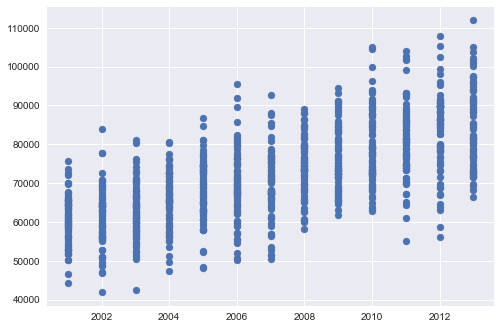

In [189]:
# Calculate adjusted Salary
salary_n = []

for i, val in enumerate(salary):
    #This means that all grad_year=2001 salaries will not change. 
    if gradyear[i] == 2001:
        ns = (val)
        salary_n.append(ns)
    else:
        ns = (val)/(1+avg_growth_rate)
        salary_n.append(ns)

df = pd.DataFrame(intel)
df['scaled_sal'] = salary_n 
plt.scatter(df.grad_year, df.scaled_sal)
plt.show()

#### (d) Re-estimate coefficients with updated variables.

In [13]:
# Code to re-estimate, output of new coefficients

Here is where I'll discuss how the coefficients differ, where I'll interpret why the changes  result in new coefficient changes, and where I'll discuss what this suggests about the answer to the question.

### 3. Assessment of Kossinets and Watts.

a)	The research question that this paper is trying to answer is, “[o]n what grounds, then, do individuals selectively make or break some ties over others, and how do these choices shed light on the observation that similar people are more likely to become acquainted than dissimilar people?”

b)	The authors have used the data from a population of 30,396 undergraduate and graduate students, faculty, and staff in a large U.S. university, who used their university e-mail accounts to both send and receive messages. The data was collected for a period of one academic year. The data was derived from three sources: 
a.	 Logs of e-mail interactions within the university over one academic year
b.	 Database of individual attributes (status, gender, age, department, number of years in the community, etc.)
c.	Records of course registration, in which courses were recorded separately for each semester.
The detailed description and definition of all the variables can be found in Appendix A of the paper.

c)	To answer the research question, data indicating the similarity among people is critical. Individual attributes such as gender, age, etc. are important in doing so. However, as indicated in Appendix B, some of the values in the university database were incorrect or missing. The authors had to  rely on longitudinal nature of the data set for values such as birthday and set of heuristics for incorrect values in gender.  

d)	In real world it is difficult to operationalize theoretical constructs, that is capture the construct from observable data. The theoretical construct is “social relationship” while the data available is the records of course registration. The author recognizes that classes are not the only foci of interaction and not necessarily the most important for the student and faculty. Even though ideally, they would have liked information of all possible activities, including, social groups, sporting, and cultural organizations, etc, the authors address this weakness creatively. They make use of  “bulk” messages, that were initially discarded in creating dyadic interaction, and treated them as social foci. 